# Ravi Ranjan
## Task-Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
### As a business manager, try to find out the weak areas where you can work to make more profit.
### What all business problems you can derive by exploring the data?

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#Check the dimentions of df
df.shape  

(9994, 13)

In [4]:
#Check for NaN/Null values
df.isnull().sum() 

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
# Check the statistical Summary
df.describe()  

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# Finding the number of duplicates
df.duplicated().sum() 

17

In [7]:
df.drop_duplicates(subset=None, keep='first', inplace=True) # Removing the duplicates

In [8]:
#Check the dimentions of df
df.shape  

(9977, 13)

In [9]:
#Check details of df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9977 non-null object
Segment         9977 non-null object
Country         9977 non-null object
City            9977 non-null object
State           9977 non-null object
Postal Code     9977 non-null int64
Region          9977 non-null object
Category        9977 non-null object
Sub-Category    9977 non-null object
Sales           9977 non-null float64
Quantity        9977 non-null int64
Discount        9977 non-null float64
Profit          9977 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [10]:
#Check for unique values in all the fields
df.nunique() 

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

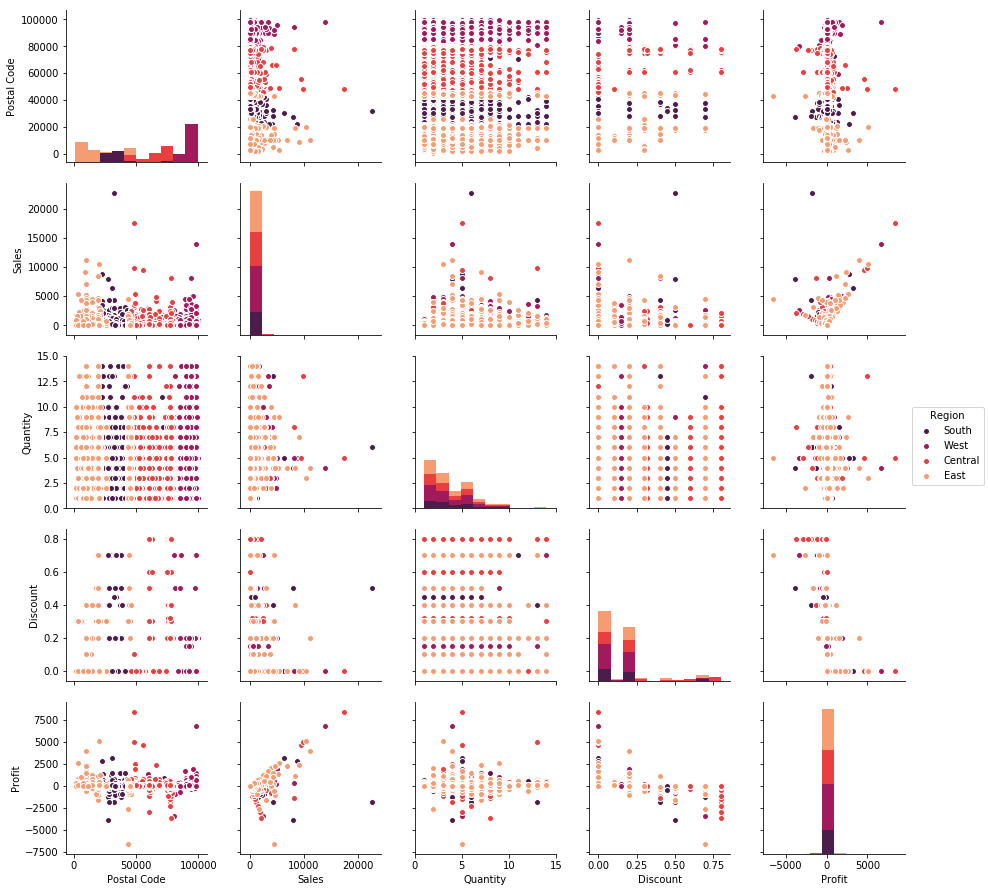

In [11]:
#Check the corelation between the different perameters.
sns.pairplot(df, hue = 'Region', palette= 'rocket', size=2.5)
plt.show()

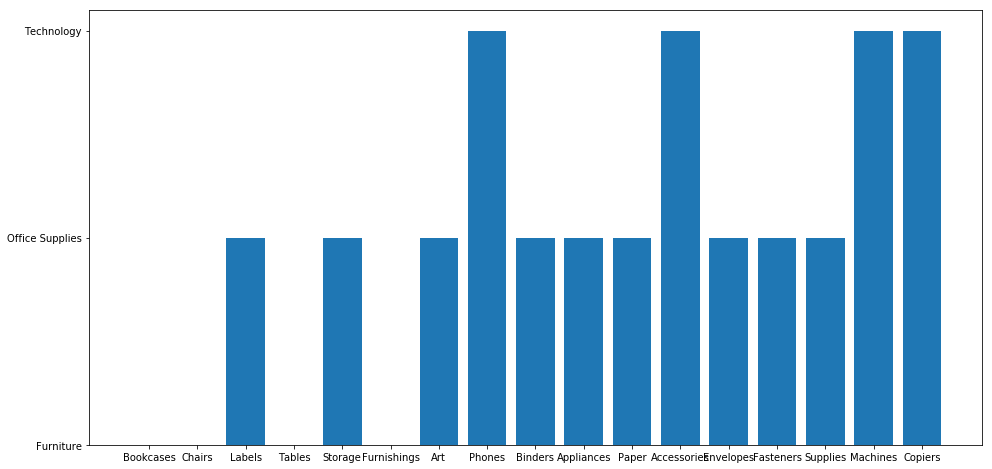

In [12]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category', 'Category', data=df)
plt.show()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

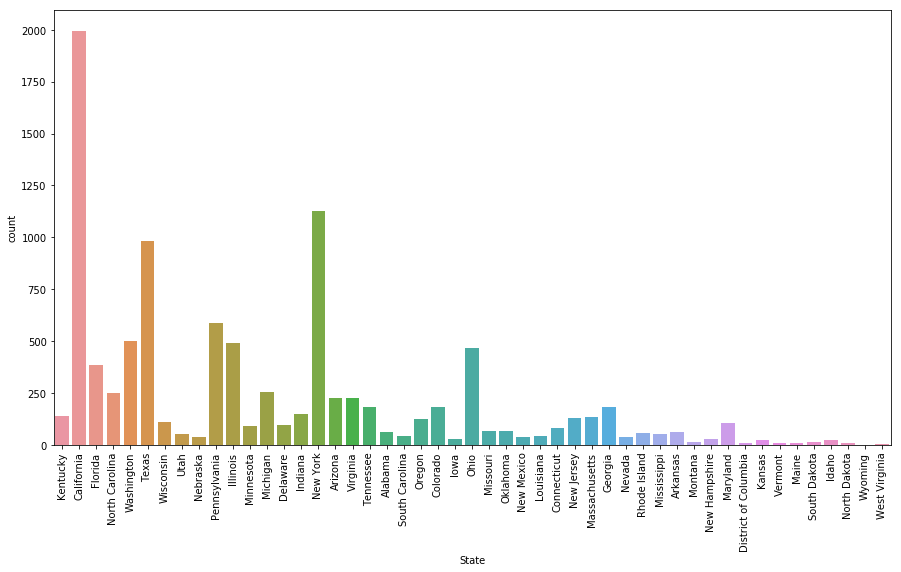

In [13]:
#Frequent of the State
print(df['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.show()

#### from the above graph we can tell that the California reorded the maximum sales among the states

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


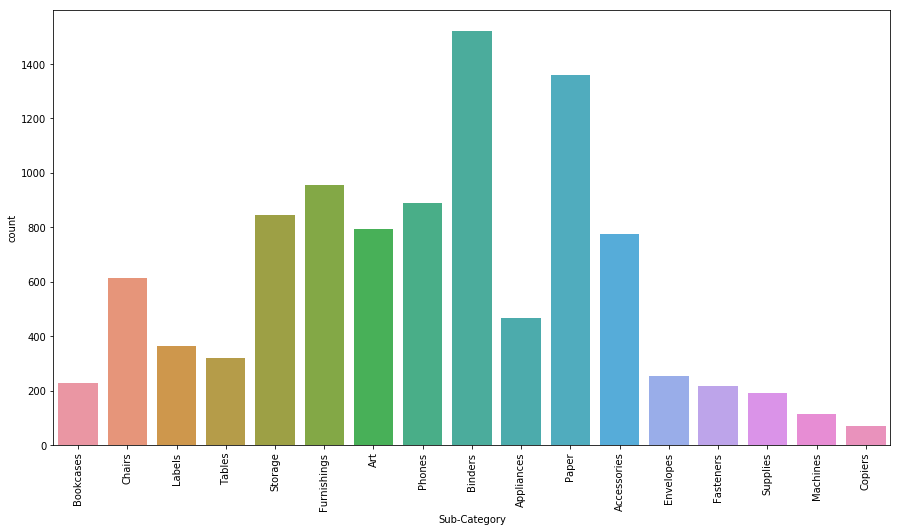

In [14]:
#Frequent of the Sub-Category  
print(df['Sub-Category'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

#### from the above graph we can tell that the Binders is most sold Sub Catagory.

In [15]:
 #Corelation
cor=df.corr()

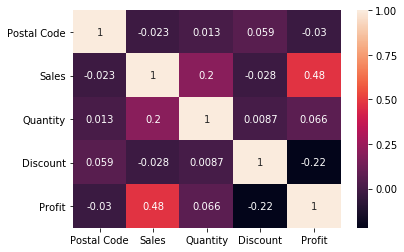

In [16]:
#Heatmap
sns.heatmap(cor, annot=True)

<Figure size 720x1440 with 0 Axes>

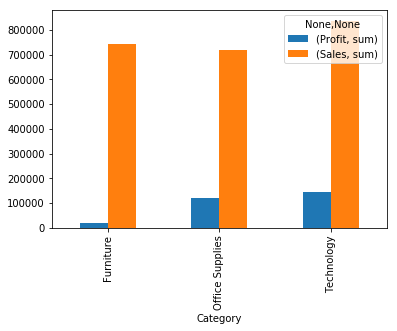

In [17]:
plt.figure(figsize= (10,20))

df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()

plt.show()

#Profit for the Furniture selling price is very less.

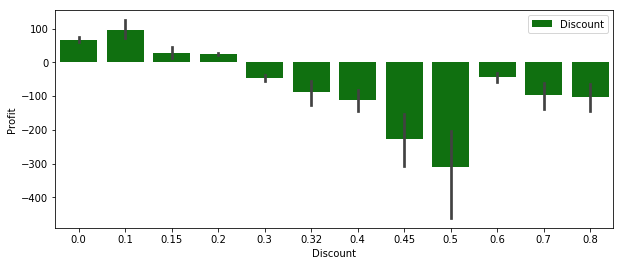

In [18]:
#Plot for Discount Vs Profit
plt.figure(figsize=(10,4))
sns.barplot('Discount', 'Profit', data=df, color ='g', label='Discount')
plt.legend()

#### from both the above graph and heatmap we can tell that their is exist inverse corelation between Discount and Profit¶

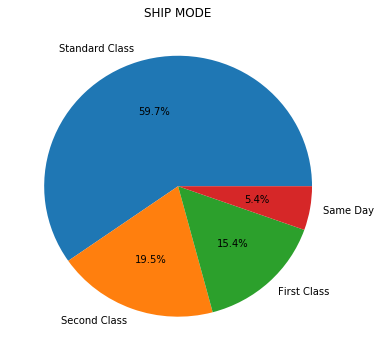

In [19]:
##Pie Chart for Share of different mode used for delivery
plt.figure(figsize = (6,6))
plt.title('SHIP MODE')
plt.pie(df['Ship Mode'].value_counts(), labels=df['Ship Mode'].value_counts().index, autopct = '%1.1f%%')
plt.show()


#### from above pie chart we can tell that, Standard Class is most prefered ship mode and Same Day is least prefered one.¶

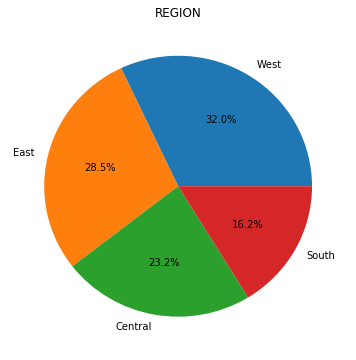

In [20]:
##Pie Chart for Share of sales in different Region
plt.figure(figsize = (6,6))
plt.title('REGION')
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index, autopct = '%1.1f%%')
plt.show()

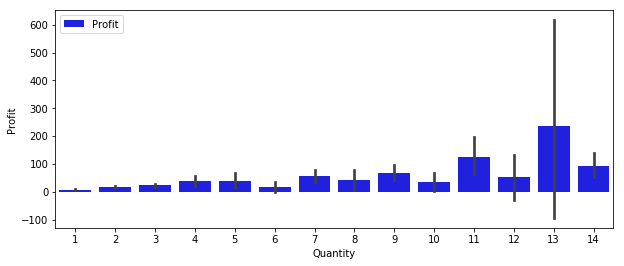

In [21]:
#Plot for Quantity Vs Profit
plt.figure(figsize=(10,4))
sns.barplot('Quantity', 'Profit', data=df, color ='b', label='Profit')
plt.legend()

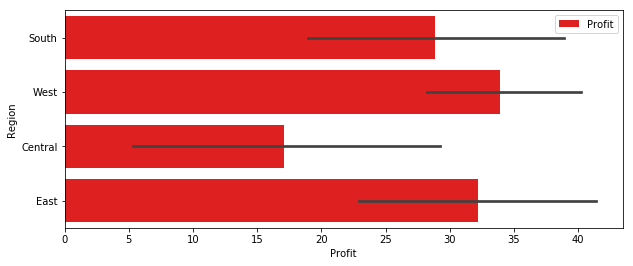

In [22]:
#Plot for Profit Vs Region
plt.figure(figsize=(10,4))
sns.barplot('Profit', 'Region', data=df, color ='r', label='Profit')
plt.legend()


#### from the above we can tell that, the Central region record the good sales but still not the best in terms of profit.

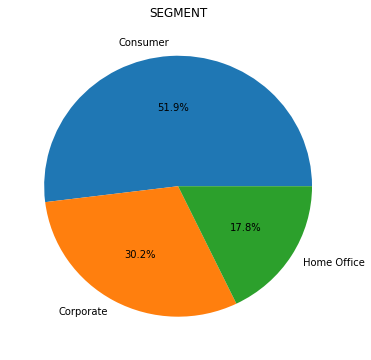

In [23]:
##Pie Chart for Share of different segments
plt.figure(figsize = (6,6))
plt.title('SEGMENT')
plt.pie(df['Segment'].value_counts(), labels=df['Segment'].value_counts().index, autopct = '%1.1f%%')
plt.show()

 #### we can say from above pie chart that, the Consumer is the most dominent segment.
### Conclusion - the weak areas where we required to focus on are -
#### a. after selling furniture,profit generated is less in comparison with other categories.so try to increase profit in this category also.
#### b. Only discount is not impacting the sale. So need to work on some different strategy. 
#### c. Central region records the good sales but profit is not significent and need to work on.